In [189]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep
import matplotlib as mpl

sys.path.append("../../../analysisTools/")
import plotTools as ptools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## df saving functions

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

## Signal

In [210]:
prefix = './coffea/skimmed/'
suffix = 'SR_ISRcuts_BestVertex'

In [211]:
# Signal
sig_histo = util.load(f'{prefix}/{suffix}.coffea')[0]

In [212]:
si = utils.get_signal_point_dict(sig_histo)

pd.options.display.float_format = '{:,.1f}'.format
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.5,1.0,10.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.5,1.0,100.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.5,1.0,1.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.2,0.5,100.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.2,0.5,1.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,55.0,10.0,100.0,50.0,60.0,0.2,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,55.0,10.0,10.0,50.0,60.0,0.2,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.2,0.5,10.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,55.0,10.0,1.0,50.0,60.0,0.2,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,52.5,5.0,100.0,50.0,55.0,0.1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100


In [213]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)

cutnames

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75']

In [214]:
pd.options.display.float_format = '{:,.2f}'.format

In [298]:
purity = {'ct-1': [], 'ct-10': [], 'ct-100': []}

In [299]:
m1 = 50
delta = 0.2

## Purity denominator: n(Events)

In [300]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [301]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [302]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [303]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.281222,0.292453,0.298292,0.298292,0.298292,0.311935


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1)

In [304]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructed')

In [305]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [306]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [307]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.695102,0.706778,0.713199,0.713199,0.713199,0.721573


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx`)

In [308]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx')

In [309]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [310]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [311]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.695102,0.706778,0.713199,0.713199,0.713199,0.721573


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta)

In [312]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_pteta')

In [313]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [314]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [315]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.699684,0.709443,0.715972,0.715972,0.715972,0.724412


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta AND jet overlap removal)

In [316]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_ptetaoverlap')

In [317]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [318]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [319]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.733533,0.720286,0.727262,0.727262,0.727262,0.727262


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta AND jet overlap removal AND electron ID)

In [320]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_ecuts')

In [321]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [322]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [323]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.986102,0.984356,0.984021,0.984021,0.984021,0.984021


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `GoodVtx` -- pass electron pT, eta, jet overlap removal, ID for both electrons and OSSF)

In [324]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedGoodVtx')

In [325]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [326]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [327]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.986102,0.984356,0.984021,0.984021,0.984021,0.984021


In [328]:
prefix = './coffea/skimmed/'
suffix = '_SR_ISRcuts'

In [329]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [330]:
# efficiency
pd.options.display.float_format = '{:,.6f}'.format
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow')

bkg_eff_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Top,0.000129,0.000013,0.000008,0.000007,0.000007,0.000007,0.000007
DY,0.000011,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
Diboson,0.000637,0.000044,0.000033,0.000031,0.000030,0.000030,0.000027
Triboson,0.001933,0.000158,0.000104,0.000092,0.000091,0.000091,0.000076
W+jets,0.002310,0.000173,0.000139,0.000132,0.000131,0.000131,0.000114
Z+jets,0.006645,0.000398,0.000325,0.000310,0.000309,0.000309,0.000292
Total,0.000019,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000


In [331]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

bkg_cts_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,"38,039.83","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25
Top,"5,667.49",559.22,349.76,314.03,312.99,312.95,294.00
DY,"14,495.72",671.44,623.25,623.25,623.25,623.25,455.65
Diboson,"4,424.20",307.91,227.24,213.36,211.27,210.33,189.35
Triboson,53.00,4.32,2.85,2.51,2.51,2.50,2.09
W+jets,"227,212.60","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39"
Z+jets,"142,220.15","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76"
Total,"432,113.00","28,959.92","23,133.27","22,034.86","21,993.63","21,986.91","19,034.50"


In [332]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

bkg_cts_raw_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,12311,381,160,159,159,158,3
Top,49818,4688,3058,2348,2337,2336,2006
DY,205,13,11,11,11,11,9
Diboson,18067,1234,915,860,852,848,767
Triboson,2257,170,116,106,105,104,92
W+jets,697657,48425,37015,35472,35415,35377,29090
Z+jets,1281459,67427,52627,50986,50934,50903,44480
Total,2061774,122338,93902,89942,89813,89737,76447


# Plot

In [333]:
def plot_1D(ax, sig_histo, var, samp, cut, label, rebin = 1j, xlim = [], xlabel = '', ylabel = '', doDensity = False, doYerr = False):
    histo = sig_histo[var][{"samp":samp,"cut":cut}][::rebin]

    binwidth = histo.axes.widths[0][0]

    # set x range manually
    if xlim != []:
        ax.set_xlim(xlim[0], xlim[1])

    # x and y labels
    if xlabel != '':
        ax.set_xlabel(xlabel)

    if ylabel != '':
        ax.set_ylabel(ylabel)
    else:
        if doDensity:
            ax.set_ylabel(f'A.U./{binwidth}')
        else:
            ax.set_ylabel(f'Events/{binwidth}')

    # Plot
    mplhep.histplot(histo, yerr=doYerr, density=doDensity, ax=ax, histtype='step', flow=None, label = label)

In [334]:
def plot_2D(ax, sig_histo, var, samp, cut, xlim = [], ylim = [], xlabel = '', ylabel = ''):
    histo = sig_histo[var][{"samp":samp,"cut":cut}]

    # set x range manually
    if xlim != []:
        xrange = (xlim[0], xlim[1])
    if ylim != []:
        yrange = (ylim[0], ylim[1])

    # x and y labels
    if xlabel != '':
        ax.set_xlabel(xlabel)

    if ylabel != '':
        ax.set_ylabel(ylabel)

    # Plot
    if xlim != [] and ylim != []:
        mplhep.hist2dplot(histo, flow=None, norm=mpl.colors.LogNorm(), ax=ax, range=np.array([xrange, yrange]))
    else:
        mplhep.hist2dplot(histo, flow=None, norm=mpl.colors.LogNorm(), ax=ax)

In [335]:
purity

{'ct-1': [0.6301217675209045,
  0.7921203970909119,
  0.7921203970909119,
  0.8081135749816895,
  0.8081135749816895,
  0.9876641035079956,
  0.9876641035079956],
 'ct-10': [0.5587128400802612,
  0.8046011328697205,
  0.806957483291626,
  0.8165248036384583,
  0.8165248036384583,
  0.9892213940620422,
  0.9892213940620422],
 'ct-100': [0.31193453073501587,
  0.7215732336044312,
  0.7215732336044312,
  0.7244120836257935,
  0.7272617816925049,
  0.9840213060379028,
  0.9840213060379028]}

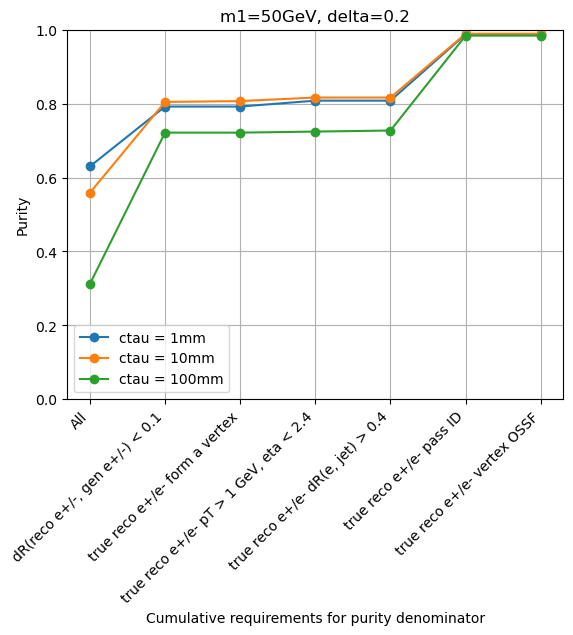

In [336]:
for ct in [1,10,100]:
    plt.plot(range(len(purity[f'ct-{ct}'])), purity[f'ct-{ct}'], '-o', label=f'ctau = {ct}mm')

plt.grid()

plt.ylim([0,1])
plt.xticks(range(len(purity[f'ct-{ct}'])), ['All', \
                                'dR(reco e+/-, gen e+/-) < 0.1', \
                                'true reco e+/e- form a vertex', \
                                'true reco e+/e- pT > 1 GeV, eta < 2.4', \
                                'true reco e+/e- dR(e, jet) > 0.4', \
                                'true reco e+/e- pass ID', \
                                'true reco e+/e- vertex OSSF'
                               ], rotation=45, ha='right')

plt.xlabel('Cumulative requirements for purity denominator')
plt.ylabel('Purity')

plt.title(f'm1={m1}GeV, delta={delta}')

plt.legend()
plt.show()